# Análise exploratória dos dados do PAC

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import json

In [134]:
df = pd.read_csv("https://www.tesourotransparente.gov.br/ckan/dataset/d3b85c7b-a86c-4d5a-bcc9-0e54d5baaf0d/resource/b6653618-b52f-4e0c-a710-103a433b516b/download/PAC---VALORES-PAGOS.csv",
sep=";")

In [135]:
df.head()

,Esfera Orçamentária,Unnamed: 1,UO - Órgão Superior,Unnamed: 3,Unidade Orçamentária,Unnamed: 5,Função Governo,Unnamed: 7,Subfunção Governo,Unnamed: 9,...,Unnamed: 19,Grupo Despesa,Unnamed: 21,Modalidade Aplicação,Unnamed: 23,Resultado EOF,Unnamed: 25,Ano Lançamento,2019,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mês Lançamento,Saldo - R$ (Item Informação),Saldo - R$ (Item Informação)
1,1,ORCAMENTO FISCAL,20000.0,PRESIDENCIA DA REPUBLICA,20101.0,PRESIDENCIA DA REPUBLICA,28.0,ENCARGOS ESPECIAIS,846.0,OUTROS ENCARGOS ESPECIAIS,...,DESPESAS DE CAPITAL,5.0,INVERSOES FINANCEIRAS,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2019,"59.600.000,00",NaN
2,1,ORCAMENTO FISCAL,20000.0,PRESIDENCIA DA REPUBLICA,20128.0,SECRETARIA ESPECIAL DE PORTOS/PR,26.0,TRANSPORTE,784.0,TRANSPORTE HIDROVIARIO,...,DESPESAS DE CAPITAL,4.0,INVESTIMENTOS,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2018,NaN,"1.195.501,93"
3,1,ORCAMENTO FISCAL,20101.0,PRESIDENCIA DA REPUBLICA,20416.0,EMPRESA DE PLANEJAMENTO E LOGISTICA S.A.- EPL,26.0,TRANSPORTE,121.0,PLANEJAMENTO E ORCAMENTO,...,DESPESAS CORRENTES,3.0,OUTRAS DESPESAS CORRENTES,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2018,NaN,"1.069.574,45"
4,1,ORCAMENTO FISCAL,20101.0,PRESIDENCIA DA REPUBLICA,20416.0,EMPRESA DE PLANEJAMENTO E LOGISTICA S.A.- EPL,26.0,TRANSPORTE,121.0,PLANEJAMENTO E ORCAMENTO,...,DESPESAS DE CAPITAL,4.0,INVESTIMENTOS,32.0,EXECUCAO ORCAMENTARIA DELEGADA AOS ESTADOS/DF,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2018,NaN,"1.053.075,65"


In [19]:
df.columns

Index(['Esfera Orçamentária', 'Unnamed: 1', 'UO - Órgão Superior',
       'Unnamed: 3', 'Unidade Orçamentária', 'Unnamed: 5', 'Função Governo',
       'Unnamed: 7', 'Subfunção Governo', 'Unnamed: 9', 'Programa Governo',
       'Unnamed: 11', 'Ação Governo', 'Unnamed: 13', 'Localizador Gasto',
       'Unnamed: 15', 'Iduso', 'Unnamed: 17', 'Categoria Econômica Despesa',
       'Unnamed: 19', 'Grupo Despesa', 'Unnamed: 21', 'Modalidade Aplicação',
       'Unnamed: 23', 'Resultado EOF', 'Unnamed: 25', 'Ano Lançamento', '2019',
       '2018'],
      dtype='object')

In [136]:
## renomear colunas para facilitar a identificação
df.rename(columns={'Esfera Orçamentária':'esfera orcamentaria id', 'Unnamed: 1':'esfera orcamentaria', 'UO - Órgão Superior':'orgao superior id',
'Unnamed: 3':'orgao superior', 'Unidade Orçamentária':'unidade orçamentariaid', 'Unnamed: 5':'unidade orcamentaria',
'Função Governo':'funcao governo id', 'Unnamed: 7':'funcao governo', 'Subfunção Governo':'subfuncao governo id',
'Unnamed: 9':'subfuncao governo', 'Programa Governo':'programa governo id', 'Unnamed: 11':'programa governo',
'Ação Governo':'acao governo id', 'Unnamed: 13':'acao governo', 'Localizador Gasto':'localizador gasto id',
'Unnamed: 15':'localizador gasto', 'Iduso':'id uso', 'Unnamed: 17':'uso', 'Categoria Econômica  Despesa': 'categoria economica despesa id',
'Unnamed: 19': 'categoria economica despesa', 'Grupo Despesa':'grupo despesa id', 'Unnamed: 21':'grupo despesa',
'Modalidade Aplicação':'modalidade aplicacao id', 'unnamed: 23':'modalidade aplicacao', 'Resultado EOF':'resultado eof id',
'Unnamed: 25':'resultado eof', 'Unnamed: 25':'resultado eof', 'Ano Lançamento':'ano lançamento id', '2019':'saldo 2019', '2018':'saldo 2018'}, inplace=True)

In [137]:
df.head(4)

,esfera orcamentaria id,esfera orcamentaria,orgao superior id,orgao superior,unidade orçamentariaid,unidade orcamentaria,funcao governo id,funcao governo,subfuncao governo id,subfuncao governo,...,categoria economica despesa,grupo despesa id,grupo despesa,modalidade aplicacao id,Unnamed: 23,resultado eof id,resultado eof,ano lançamento id,saldo 2019,saldo 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mês Lançamento,Saldo - R$ (Item Informação),Saldo - R$ (Item Informação)
1,1,ORCAMENTO FISCAL,20000.0,PRESIDENCIA DA REPUBLICA,20101.0,PRESIDENCIA DA REPUBLICA,28.0,ENCARGOS ESPECIAIS,846.0,OUTROS ENCARGOS ESPECIAIS,...,DESPESAS DE CAPITAL,5.0,INVERSOES FINANCEIRAS,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2019,"59.600.000,00",NaN
2,1,ORCAMENTO FISCAL,20000.0,PRESIDENCIA DA REPUBLICA,20128.0,SECRETARIA ESPECIAL DE PORTOS/PR,26.0,TRANSPORTE,784.0,TRANSPORTE HIDROVIARIO,...,DESPESAS DE CAPITAL,4.0,INVESTIMENTOS,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2018,NaN,"1.195.501,93"
3,1,ORCAMENTO FISCAL,20101.0,PRESIDENCIA DA REPUBLICA,20416.0,EMPRESA DE PLANEJAMENTO E LOGISTICA S.A.- EPL,26.0,TRANSPORTE,121.0,PLANEJAMENTO E ORCAMENTO,...,DESPESAS CORRENTES,3.0,OUTRAS DESPESAS CORRENTES,90.0,APLICACOES DIRETAS,3.0,PRIMARIO SEM IMPACTO FISCAL,DEZ/2018,NaN,"1.069.574,45"


In [138]:
## remoção da primeira linha
df.drop(labels=0, axis=0, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 1 to 1988
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   esfera orcamentaria id       1988 non-null   object 
 1   esfera orcamentaria          1987 non-null   object 
 2   orgao superior id            1987 non-null   float64
 3   orgao superior               1987 non-null   object 
 4   unidade orçamentariaid       1987 non-null   float64
 5   unidade orcamentaria         1987 non-null   object 
 6   funcao governo id            1987 non-null   float64
 7   funcao governo               1987 non-null   object 
 8   subfuncao governo id         1987 non-null   float64
 9   subfuncao governo            1987 non-null   object 
 10  programa governo id          1987 non-null   float64
 11  programa governo             1987 non-null   object 
 12  acao governo id              1987 non-null   object 
 13  acao governo      

In [140]:
## tratamento das duas colunas refente a valores
df['saldo 2018'].fillna(0, inplace=True)
df['saldo 2019'].fillna(0, inplace=True)

In [141]:
## remoção dos dots
import re
df['saldo 2018'] = [re.sub("\.", '', str(x)) for x in df['saldo 2018']]
df['saldo 2019'] = [re.sub("\.", '', str(x)) for x in df['saldo 2019']]

In [145]:
df['saldo 2018'][2]

'1195501,93'

In [147]:
## substituição davírgula pelo dot
df['saldo 2019'] = [x.replace(",",'.') for x in df['saldo 2019']]
df['saldo 2018'] = [x.replace(',','.') for x in df['saldo 2018']]

In [148]:
## transformação em formato float
df['saldo 2019'] = np.float64(df['saldo 2019'])
df['saldo 2018'] = np.float64(df['saldo 2018'])

### Análise exploratória

In [111]:
df['grupo despesa'].value_counts()

INVESTIMENTOS                1693
OUTRAS DESPESAS CORRENTES     261
INVERSOES FINANCEIRAS          33
Name: grupo despesa, dtype: int64

In [132]:
df.groupby(['grupo despesa']).sum()

,orgao superior id,unidade orçamentariaid,funcao governo id,subfuncao governo id,programa governo id,id uso,Categoria Econômica Despesa,grupo despesa id,modalidade aplicacao id,resultado eof id,saldo 2019,saldo 2018
grupo despesa,,,,,,,,,,,,
INVERSOES FINANCEIRAS,1205113.0,1525338.0,924.0,27915.0,33417.0,0.0,132.0,165.0,2970.0,99.0,6.031830e+09,4.283937e+09
INVESTIMENTOS,79031707.0,80088891.0,34164.0,1015329.0,3163279.0,82.0,6772.0,6772.0,113069.0,5163.0,1.870669e+10,1.999986e+10
OUTRAS DESPESAS CORRENTES,11414315.0,11695867.0,4914.0,105829.0,604137.0,6.0,783.0,783.0,21784.0,783.0,2.342461e+09,3.311849e+09


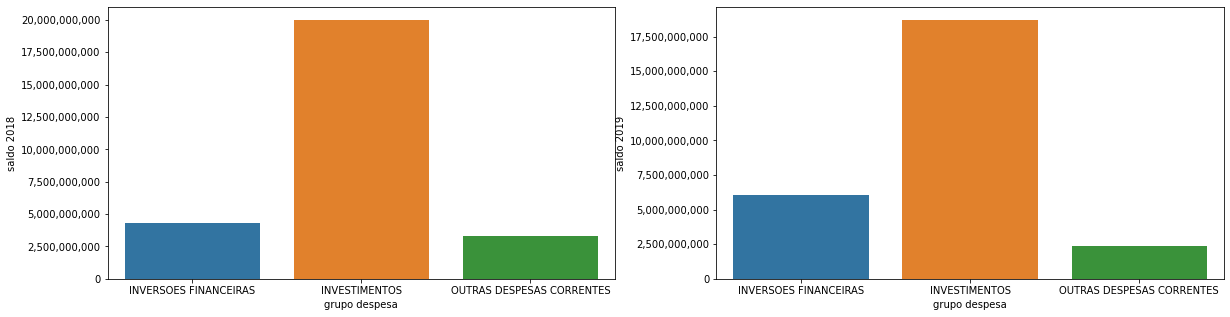

In [197]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=df.groupby(['grupo despesa']).sum(), y='saldo 2018', x=df.groupby(['grupo despesa']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(tick)

plt.subplot(1,2,2)
ax2 = sns.barplot(data=df.groupby(['grupo despesa']).sum(), y='saldo 2019', x=df.groupby(['grupo despesa']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax2.yaxis.set_major_formatter(tick)
plt.show()

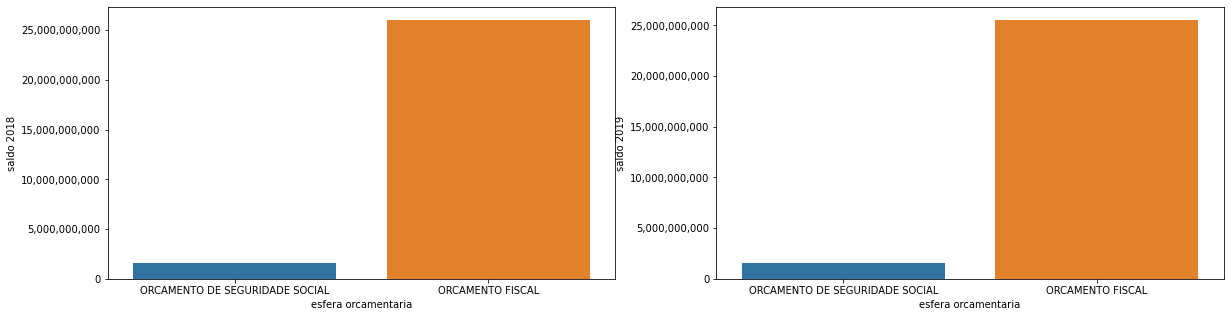

In [200]:
fig, ax = plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=df.groupby(['esfera orcamentaria']).sum(), y='saldo 2018', x=df.groupby(['esfera orcamentaria']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(tick)

plt.subplot(1,2,2)
ax1 = sns.barplot(data=df.groupby(['esfera orcamentaria']).sum(), y='saldo 2019', x=df.groupby(['esfera orcamentaria']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(tick)

plt.show()

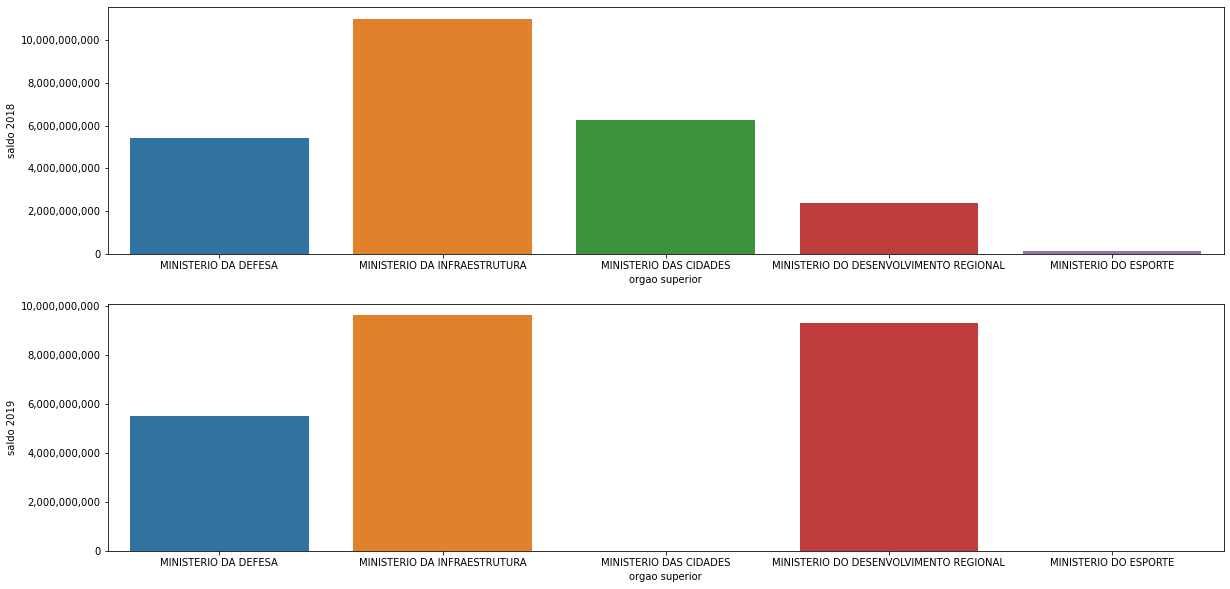

In [220]:
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(2,1,1)
ax1 = sns.barplot(data=df[df['orgao superior'].map(df['orgao superior'].value_counts()) > 60].groupby(['orgao superior']).sum(),
 y='saldo 2018', x=df[df['orgao superior'].map(df['orgao superior'].value_counts()) > 60].groupby(['orgao superior']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(tick)

plt.subplot(2,1,2)
ax1 = sns.barplot(data=df[df['orgao superior'].map(df['orgao superior'].value_counts()) > 60].groupby(['orgao superior']).sum(),
 y='saldo 2019', x=df[df['orgao superior'].map(df['orgao superior'].value_counts()) > 60].groupby(['orgao superior']).sum().index)
tick = mtick.StrMethodFormatter('{x:,.0f}')
ax1.yaxis.set_major_formatter(tick)

plt.show()